In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
imagen = Image.open("perrito.jpeg")

In [3]:
imagen = np.array(imagen)

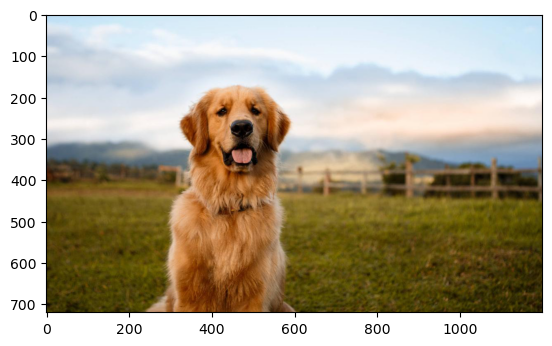

In [4]:
plt.imshow(imagen)

In [5]:
imagen.shape

(720, 1200, 3)

In [6]:
imagen 

array([[[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [211, 227, 240],
        [211, 227, 240],
        [211, 227, 240]],

       [[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [210, 226, 239],
        [211, 227, 240],
        [211, 227, 240]],

       [[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [209, 227, 241],
        [209, 227, 241],
        [209, 227, 241]],

       ...,

       [[ 62,  50,   0],
        [ 62,  50,   0],
        [ 66,  54,   2],
        ...,
        [ 67,  60,  18],
        [ 63,  56,  12],
        [ 55,  48,   2]],

       [[ 59,  47,   0],
        [ 59,  47,   0],
        [ 63,  51,   0],
        ...,
        [ 61,  54,  12],
        [ 59,  52,   8],
        [ 52,  45,   0]],

       [[ 55,  43,   0],
        [ 55,  43,   0],
        [ 59,  47,   0],
        ...,
        [ 53,  46,   4],
        [ 50,  43,   0],
        [ 44,  37,   0]]

In [7]:
alto, ancho, _ = imagen.shape

In [8]:
imagen_verde = np.zeros((alto, ancho, 3), dtype=np.uint8) # Creo una matriz "vacia" para empezar a manipular la imagen 

In [9]:
for y in range(alto):
    for x in range(ancho):
        imagen_verde[y,x] = (0,255,0)

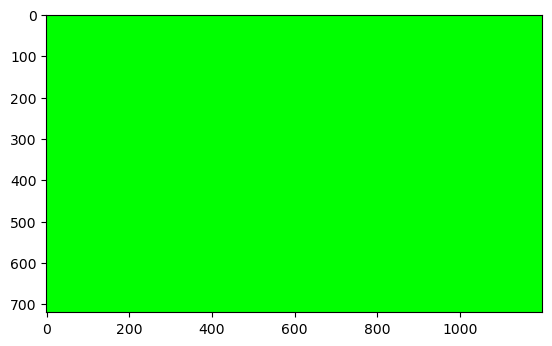

In [10]:
plt.imshow(imagen_verde)

In [13]:
# Odificar solo una cantidad de pixeles
for y in range (300,500):
    for x in range(650,930):
        imagen[y,x] = (255,0,0)


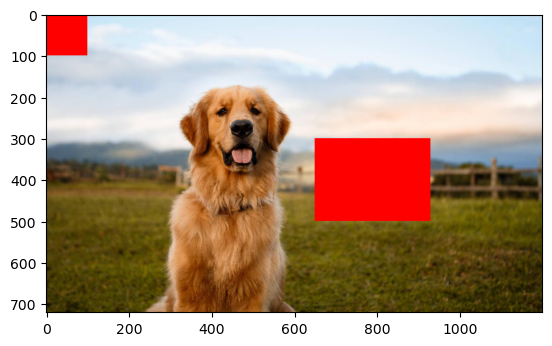

In [14]:
plt.imshow(imagen)

In [15]:
imagen_perrito = Image.open("perrito.jpeg")

In [16]:
imagen_perrito=np.array(imagen_perrito)

In [21]:
# Convrtir a escala de grises 
for y in range(180, 720):
    for x in range(250,660):
        rojo = imagen[y,x][0]
        verde = imagen_perrito[y,x][1]
        azul = imagen_perrito[y,x][2]

        #Calcular el promedio para obtener el valor de gris
        gris = (rojo + verde + azul) / 3
        
        imagen_perrito[y,x]= (gris, gris, gris)

C:\Users\odstr\AppData\Local\Temp\ipykernel_21348\3061800839.py:9: RuntimeWarning: overflow encountered in scalar add
  gris = (rojo + verde + azul) / 3


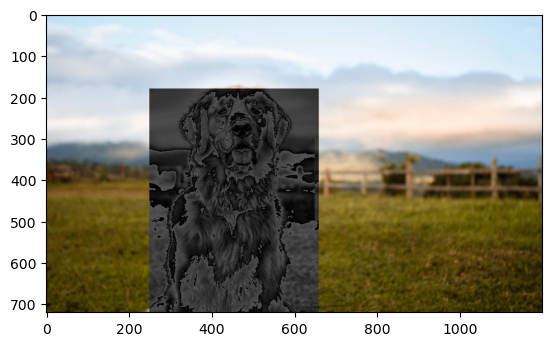

In [22]:
plt.imshow(imagen_perrito)

### Máquina de soporte vectorial

In [23]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [40]:
datos = datasets.load_digits()
X = datos.data[:,:2]

In [41]:
y = datos.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Establece las cracterísticas para asegurarnos que tosas esten en la misma escala 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
svm = SVC(kernel='linear', random_state=42)

In [45]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
y_pred = svm.predict(X_test)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.11944444444444445

### Graficar 

In [48]:
X_min, X_max = X[:, 0].min()-1, X[:, 0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(X_min, X_max, 0.02), np.arange(y_min, y_max, 0.02))

In [49]:
z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape) # Tener los datos en otra dimension

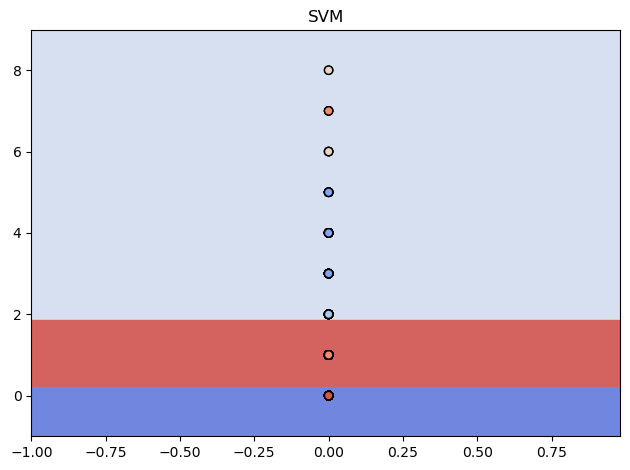

In [51]:
plt.contourf(xx, yy,z, cmap=plt.cm.coolwarm, alpha=0.8)

#Graficar los puntos de datos 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM")

plt.tight_layout()
plt.show()